# Data Understanding and Preprocessing

## Dataset

https://d2l.udst.edu.qa/d2l/login?sessionExpired=0&target=%2fd2l%2fle%2fcontent%2f136863%2fviewContent%2f3130847%2fView

In [39]:
'''
=========================================================================================
UJIIndoorLoc Dataset:
=========================================================================================
The UJIIndoorLoc is a Multi-Building Multi-Floor indoor localization database to test Indoor Positioning System that rely on WLAN/WiFi fingerprint

J. Torres-Sospedra, R. Montoliu, A. Martnez-Us, T. Arnau, and J. Avariento. "UJIIndoorLoc," UCI Machine Learning Repository, 2014. [Online]. Available: https://doi.org/10.24432/C5MS59.

Attribute 001 (WAP001): Intensity value for WAP001. Negative integer values from -104 to 0 and +100 (closer to 0 mean closer) Positive value 100 used if WAP001 was not detected.
....WAP002...WAP003... to WAP00520
Attribute 520 (WAP520): Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.
Attribute 521 (LONGITUDE): Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000
Attribute 522 (LATITUDE): Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.
Attribute 523 (FLOOR): Altitude in floors inside the building. Integer values from 0 to 4.
Attribute 524 (BUILDINGID): ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.
Attribute 525 (SPACEID): Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.
Attribute 526 (RELATIVEPOSITION): Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values. 
Attribute 527 (USERID): User identifier (see below). Categorical integer values. 
Attribute 528 (PHONEID): Android device identifier (see below). Categorical integer values.  
Attribute 529 (TIMESTAMP): UNIX Time when the capture was taken. Integer value. 

Joy: ====================================================================================
TASKS:
=========================================================================================

Basic Model Classification: Develop a simple machine learning model (e.g., Decision Tree or SVM) to predict the Building ID and Floor based on WiFi fingerprints.
Advanced Model Regression: Develop an advanced regression model (e.g., a neural network-based regressor) to enhance coordinate estimation
'''

'\n=========================================================================================\nUJIIndoorLoc Dataset:\n=========================================================================================\nThe UJIIndoorLoc is a Multi-Building Multi-Floor indoor localization database to test Indoor Positioning System that rely on WLAN/WiFi fingerprint\n\nJ. Torres-Sospedra, R. Montoliu, A. Martnez-Us, T. Arnau, and J. Avariento. "UJIIndoorLoc," UCI Machine Learning Repository, 2014. [Online]. Available: https://doi.org/10.24432/C5MS59.\n\nAttribute 001 (WAP001): Intensity value for WAP001. Negative integer values from -104 to 0 and +100 (closer to 0 mean closer) Positive value 100 used if WAP001 was not detected.\n....WAP002...WAP003... to WAP00520\nAttribute 520 (WAP520): Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.\nAttribute 521 (LONGITUDE): Longitude. Negative real values from -7695.93875492992990

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./UJIndoorLoc/trainingData.csv")
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


## Dataset Exploration

### General exploration

In [41]:
descriptive_stats = df.describe()
descriptive_stats

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [42]:
WAP_columns = [col for col in df.columns if col.startswith("WAP")]
df[WAP_columns] = df[WAP_columns].replace(100, -105) # So the range will be -105 to 0 

other_columns = ["LONGITUDE", "LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", 
                   "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

In [43]:
df[other_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LONGITUDE         19937 non-null  float64
 1   LATITUDE          19937 non-null  float64
 2   FLOOR             19937 non-null  int64  
 3   BUILDINGID        19937 non-null  int64  
 4   SPACEID           19937 non-null  int64  
 5   RELATIVEPOSITION  19937 non-null  int64  
 6   USERID            19937 non-null  int64  
 7   PHONEID           19937 non-null  int64  
 8   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


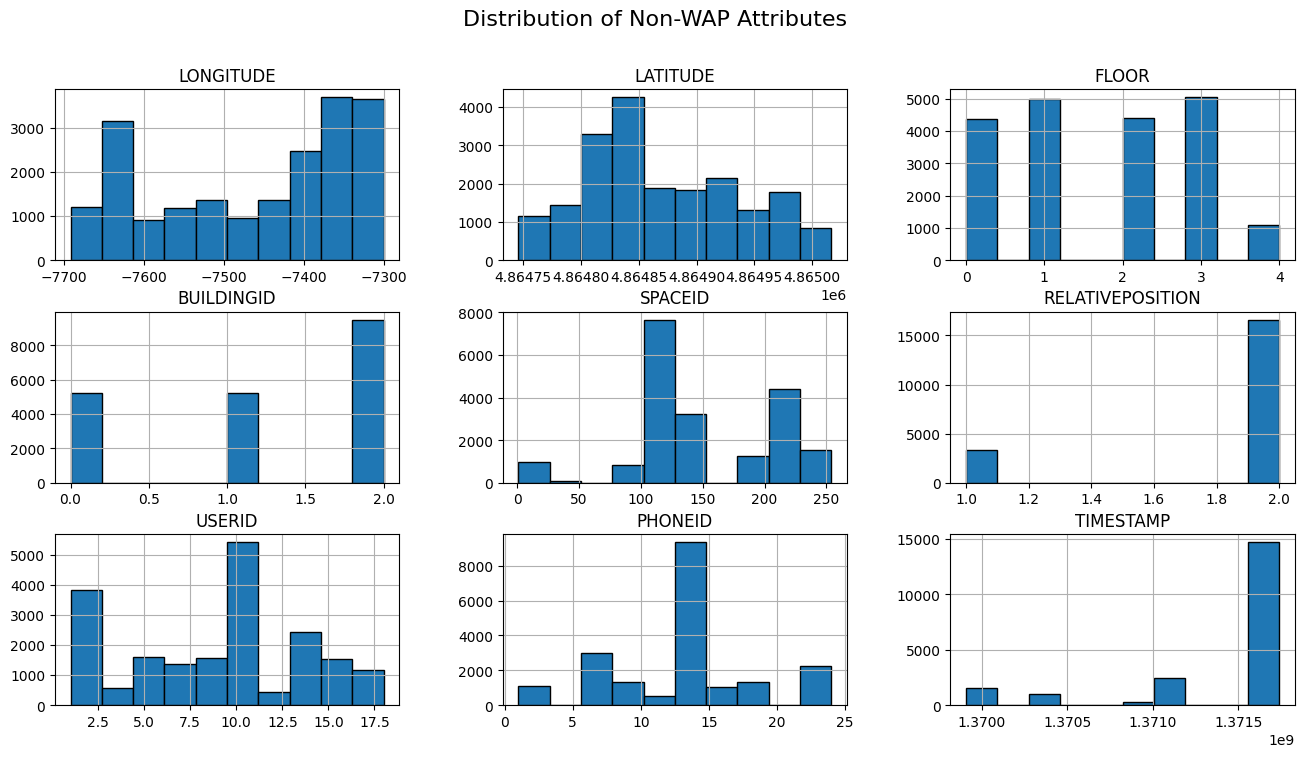

In [44]:
# Histograms for each non-WAP attribute
df[other_columns].hist(figsize=(16, 8), edgecolor='black')
plt.suptitle("Distribution of Non-WAP Attributes", fontsize=16)
plt.show()


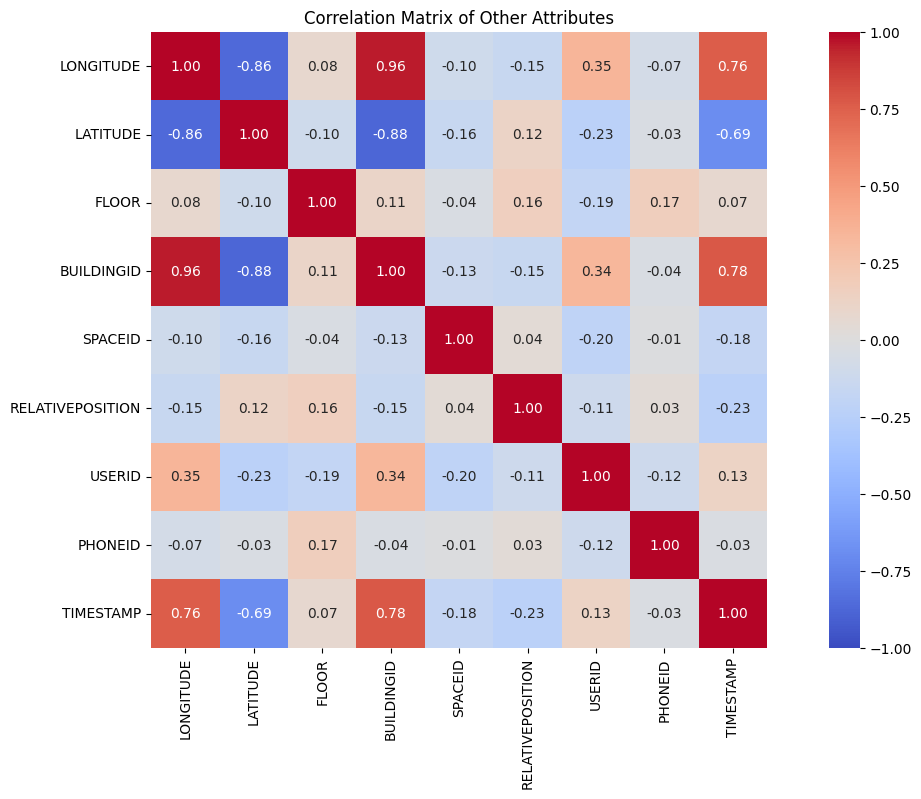

In [45]:
# Correlation matrix 
plt.figure(figsize=(16, 8))
sns.heatmap(df[other_columns].corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0, vmax= 1, vmin=-1, square=True)
plt.title("Correlation Matrix of Other Attributes")
plt.show()


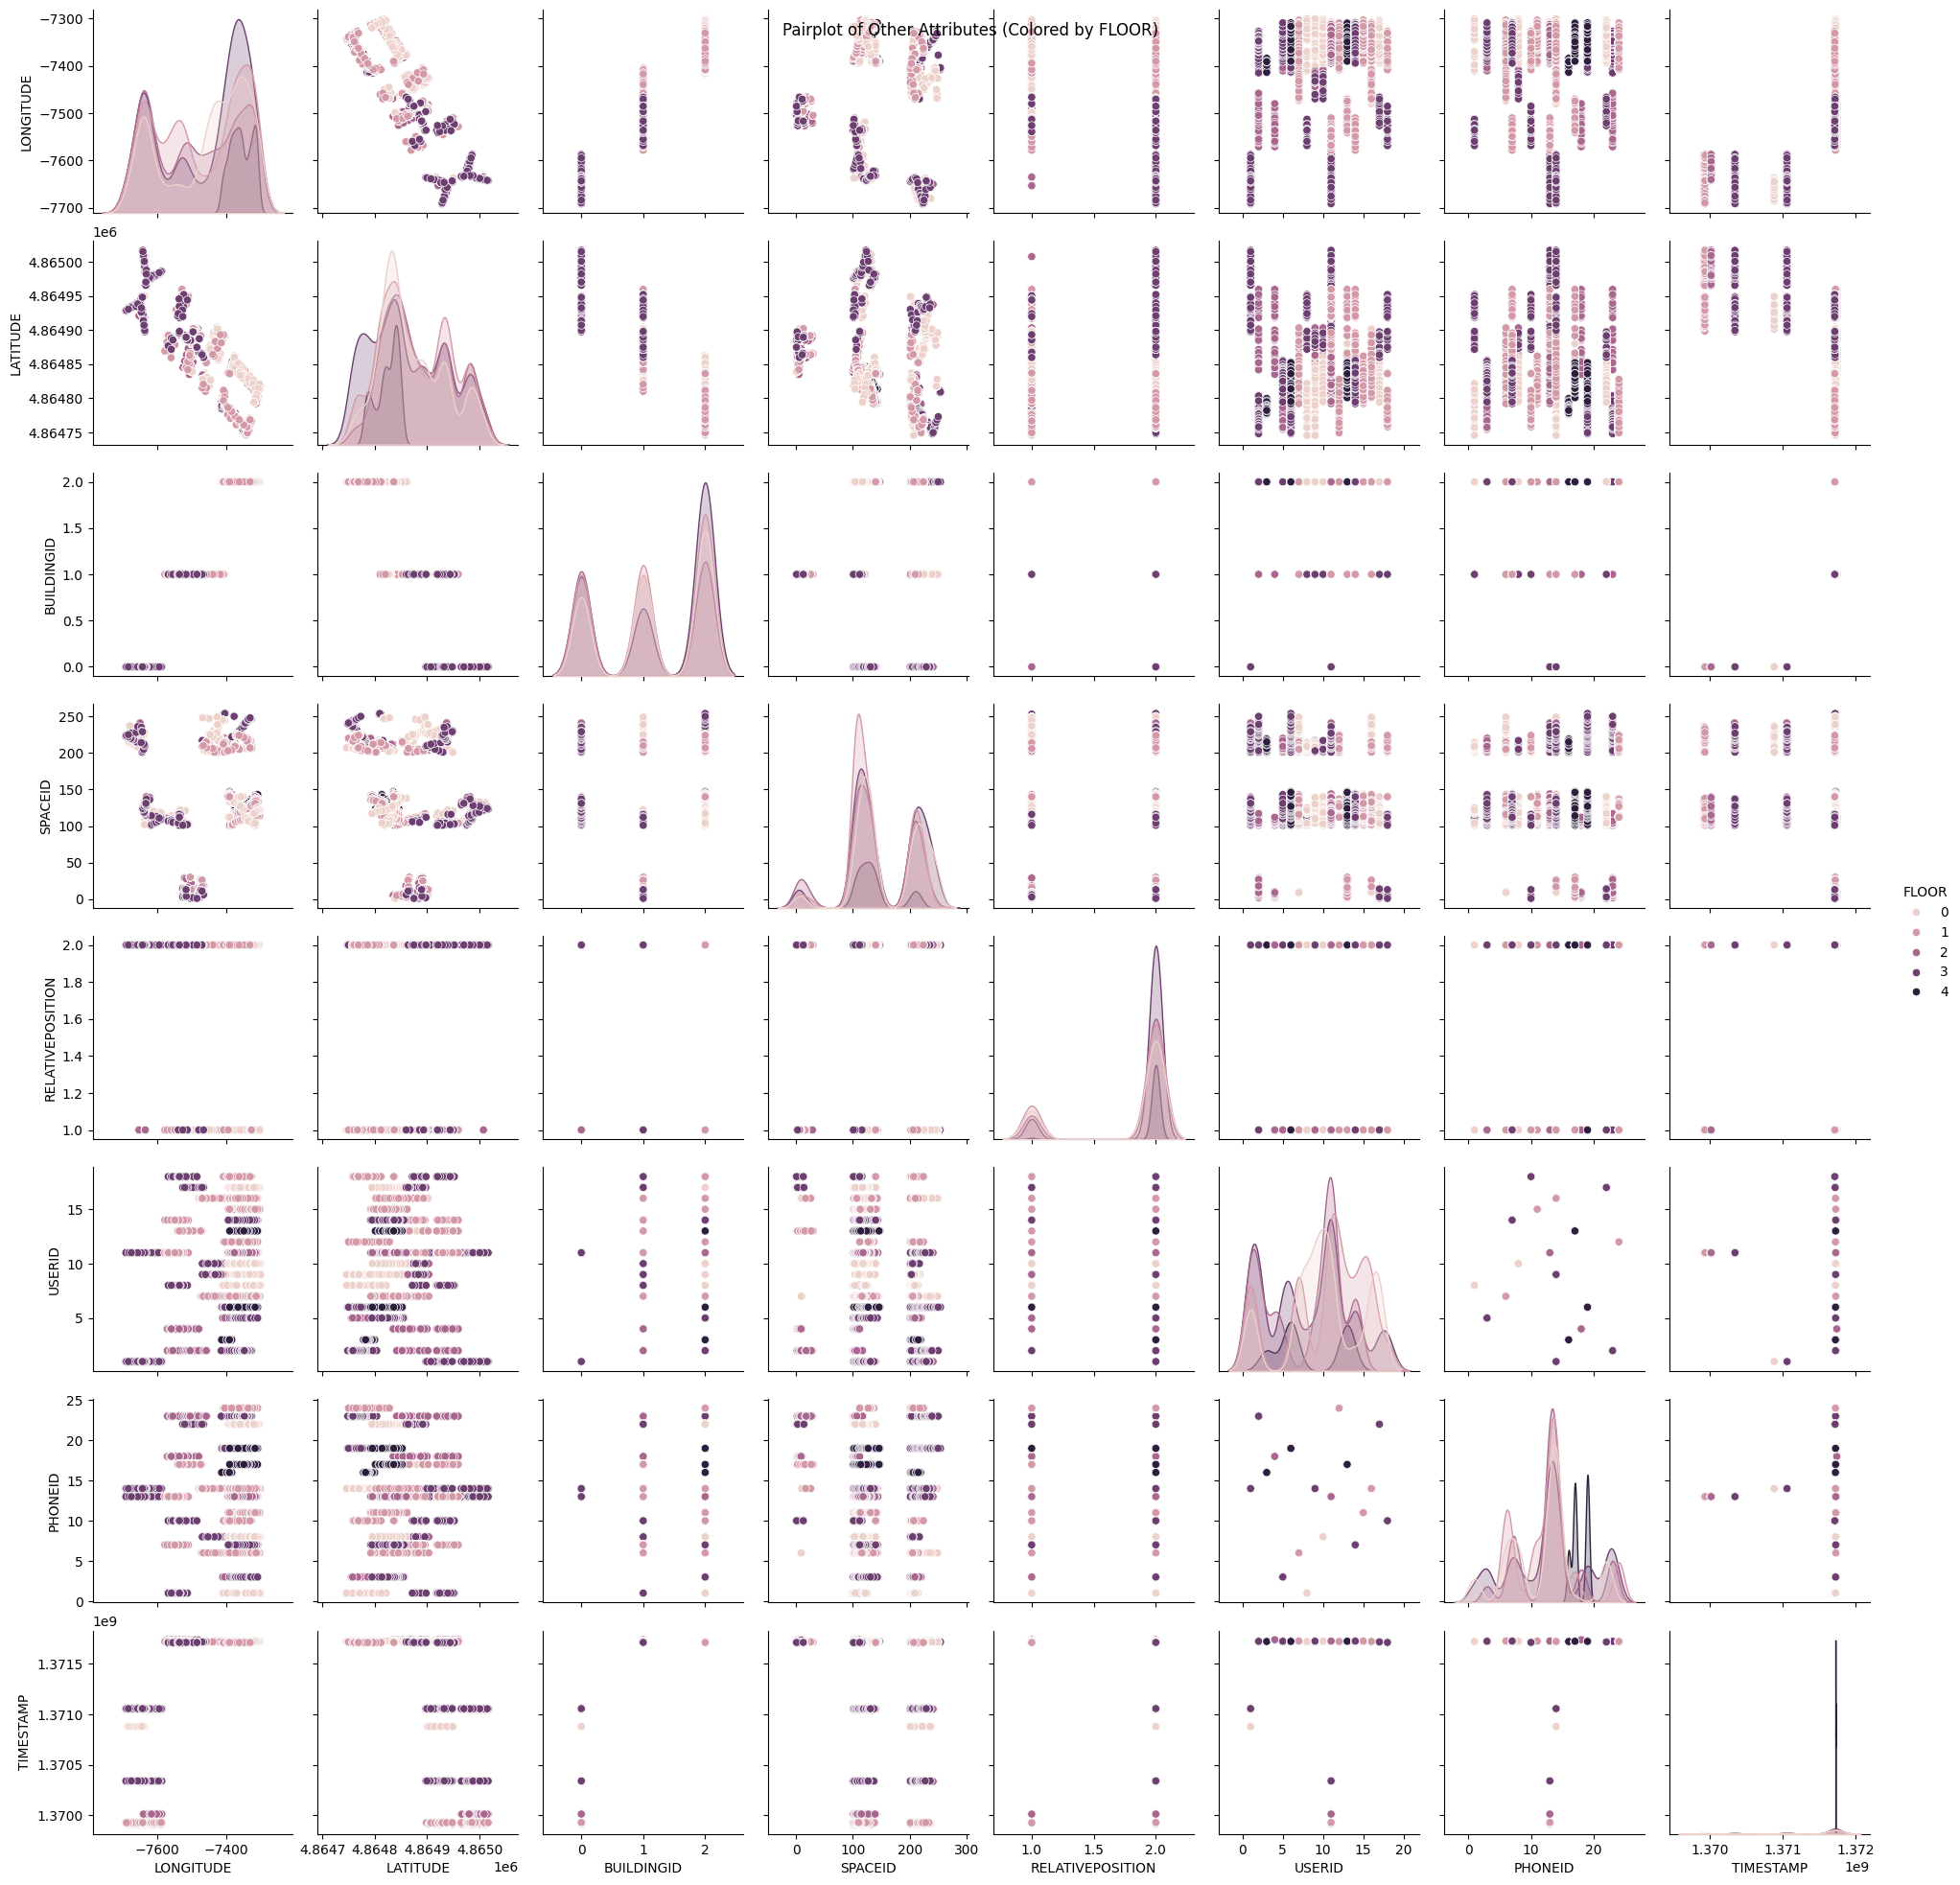

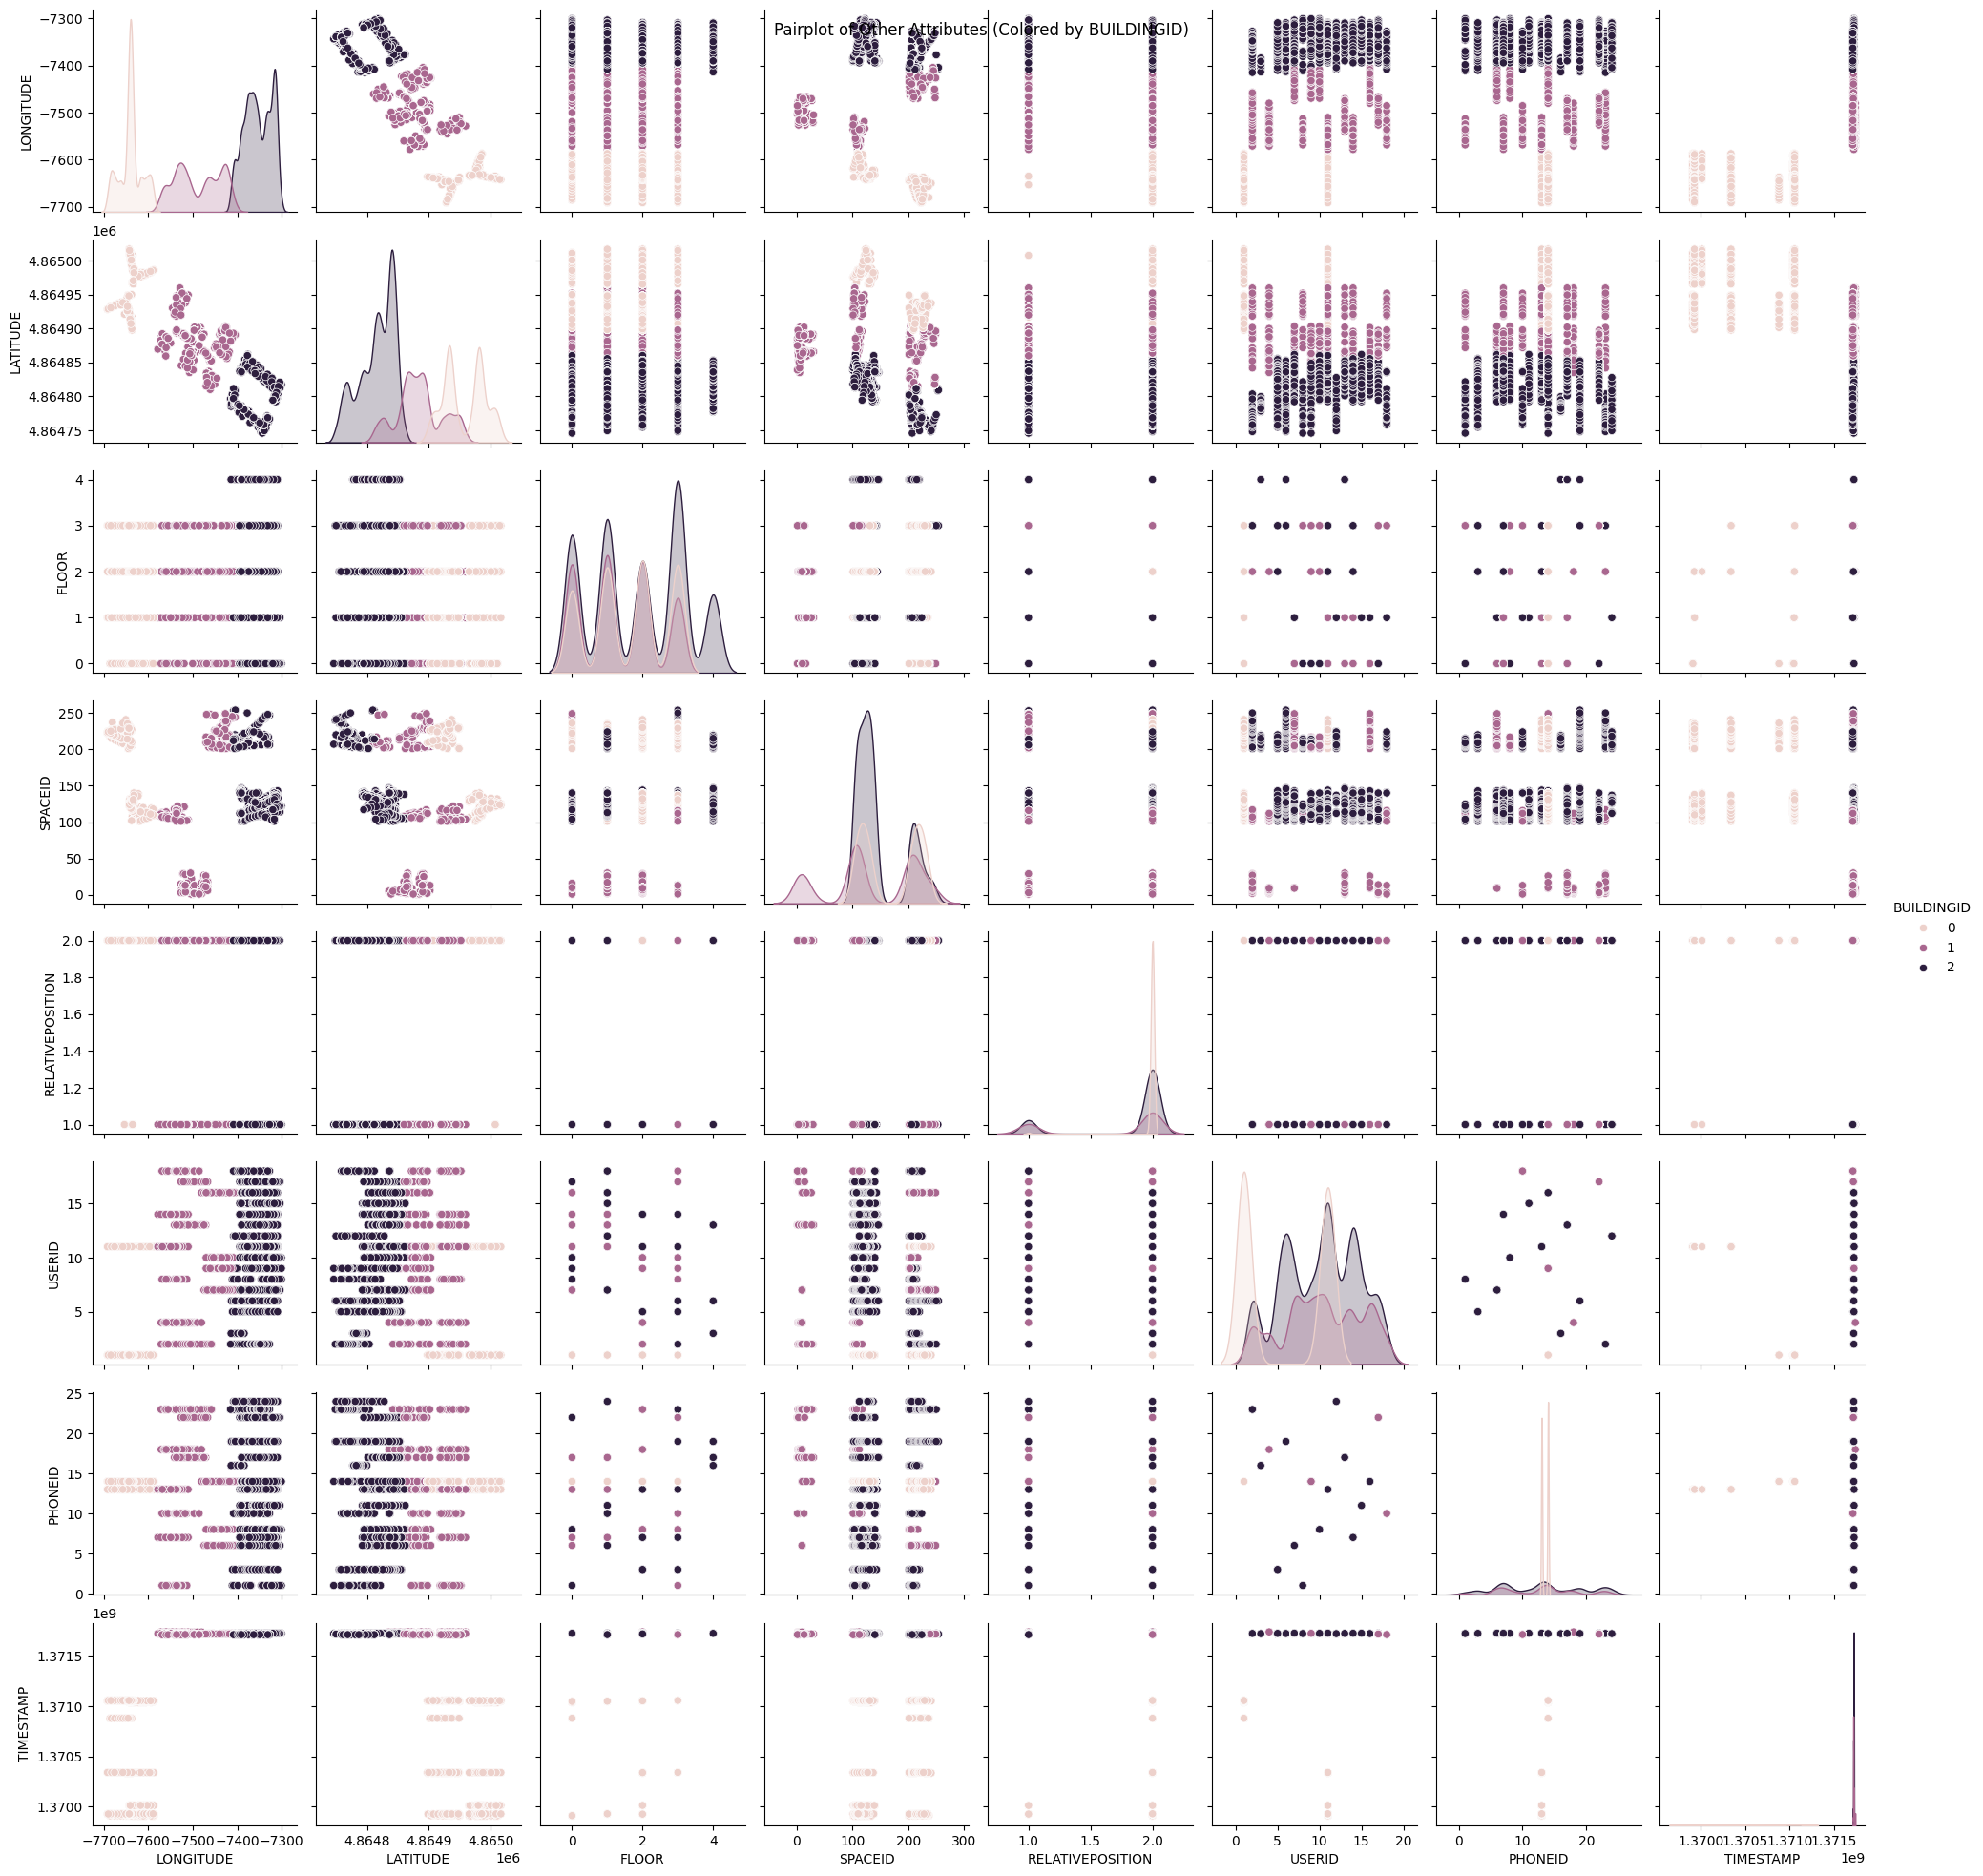

In [46]:
# Pairplot for FLOOR 
pairplot1 = sns.pairplot(df[other_columns], hue="FLOOR")
pairplot1.fig.suptitle("Pairplot of Other Attributes (Colored by FLOOR)")

# Pairplot for BUILDINGID
pairplot2 = sns.pairplot(df[other_columns], hue="BUILDINGID")
pairplot2.fig.suptitle("Pairplot of Other Attributes (Colored by BUILDINGID)")

plt.show()


### Floor and Buildings

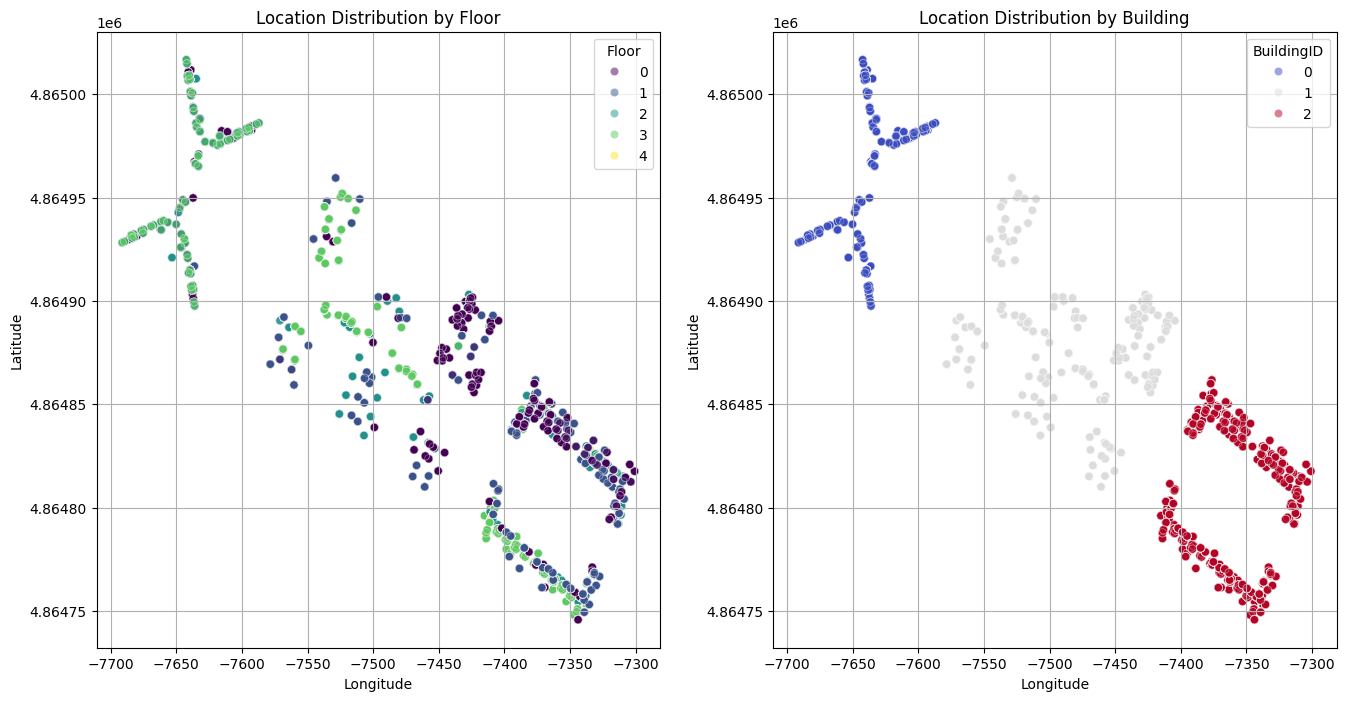

In [47]:
# Scatter plot of Longitude vs Latitude colored by Floor and By building
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["FLOOR"], alpha=0.5, palette="viridis")
plt.title("Location Distribution by Floor")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Floor")
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["BUILDINGID"], alpha=0.5, palette="coolwarm")
plt.title("Location Distribution by Building")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="BuildingID")
plt.grid()
plt.show()

In [48]:
unique_floors = sorted(df['FLOOR'].unique())
unique_buildings = sorted(df['BUILDINGID'].unique())

print("unique_floors:", unique_floors)
print("unique_buildings:", unique_buildings)

unique_floors: [0, 1, 2, 3, 4]
unique_buildings: [0, 1, 2]


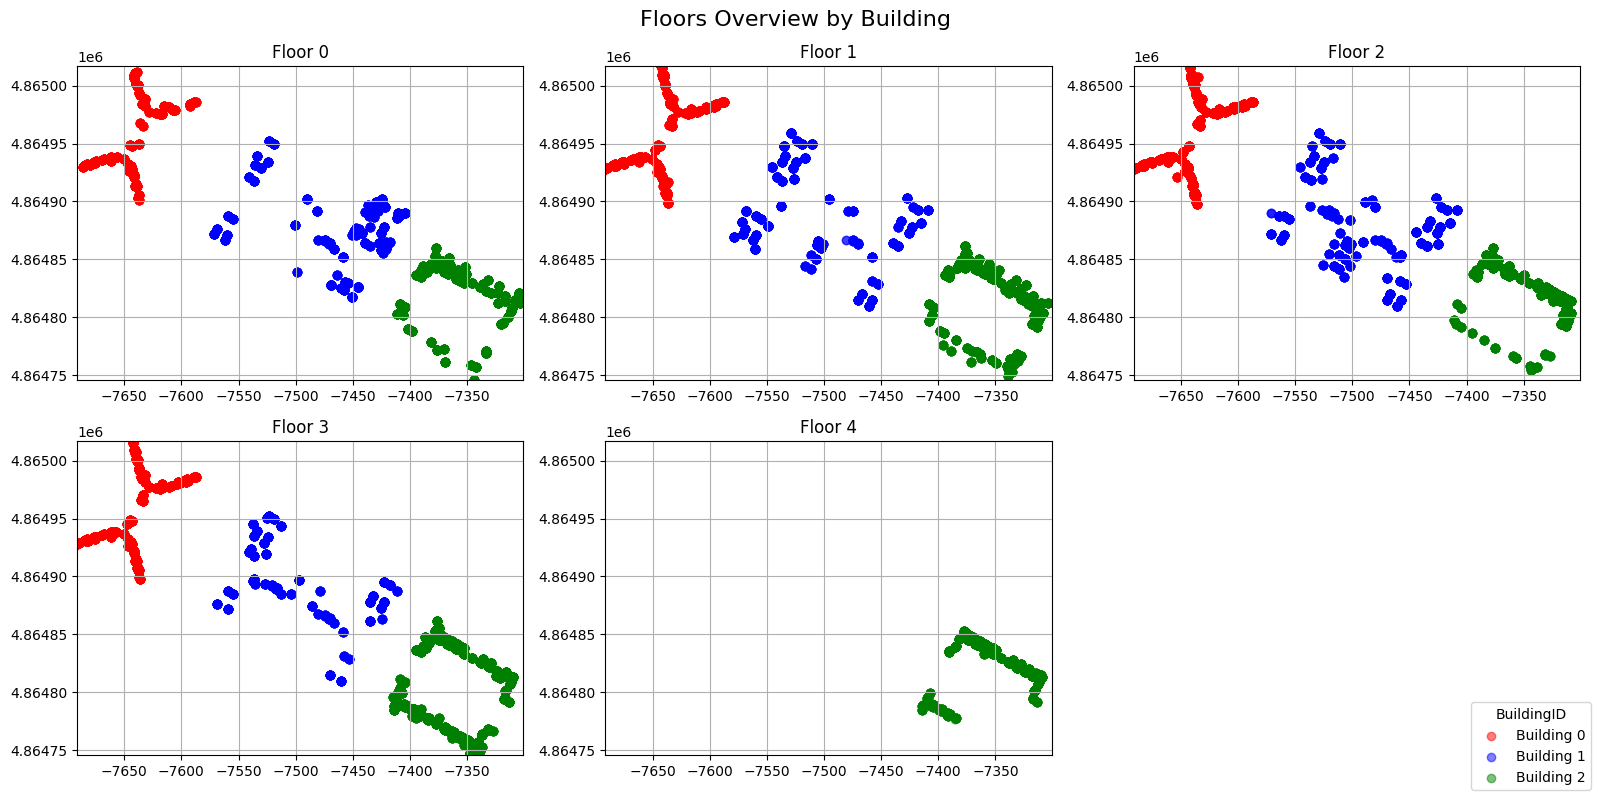

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get consistent axis limits
x_min, x_max = df['LONGITUDE'].min(), df['LONGITUDE'].max()
y_min, y_max = df['LATITUDE'].min(), df['LATITUDE'].max()

# Define unique buildings and their corresponding colors
unique_buildings = sorted(df['BUILDINGID'].unique())
building_colors = {0: "red", 1: "blue", 2: "green"}

fig = plt.figure(figsize=(16, 8))
for floor in unique_floors:
    plt.subplot(2, 3, floor + 1)  # 2 rows, 3 columns, current plot index
    floor_data = df[df['FLOOR'] == floor]

    for building in unique_buildings:
        # Scatter plot with specific building color
        building_data = floor_data[floor_data['BUILDINGID'] == building]  

        plt.scatter(
            building_data['LONGITUDE'], building_data['LATITUDE'], 
            color=building_colors[building], alpha=0.5, label=f'Building {building}'
        )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(f'Floor {floor}')
    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    plt.grid(True)

# Create a legend for buildings
labels = [f'Building {building}' for building in unique_buildings]
fig.legend(labels, loc='lower right', title='BuildingID')

# Adjust layout for better visualization
plt.suptitle('Floors Overview by Building', fontsize=16)
plt.tight_layout()
plt.show()


In [50]:
# Joy: ====================================================================================
# Now i have an overview of how the buildings and floor look like
# =========================================================================================

### WAP columns

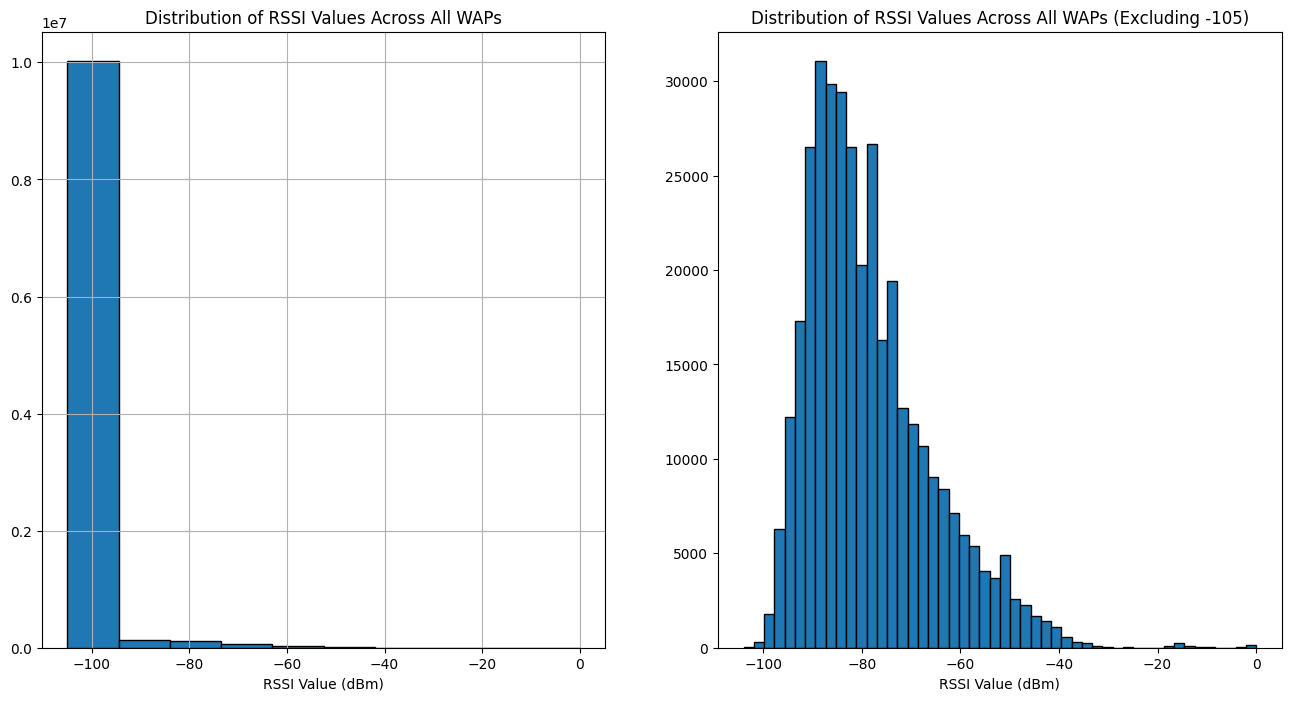

In [51]:
# Histogram of RSSI values
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
df[WAP_columns].stack().hist(edgecolor='black')
plt.title("Distribution of RSSI Values Across All WAPs")
plt.xlabel("RSSI Value (dBm)")

# Histogram of RSSI values (excluding no signals)
plt.subplot(1,2,2)
df[WAP_columns][df[WAP_columns] != -105].stack().hist(edgecolor='black', bins=50)
plt.title("Distribution of RSSI Values Across All WAPs (Excluding -105)")
plt.xlabel("RSSI Value (dBm)")
plt.grid()
plt.show()

In [52]:
# Joy: ====================================================================================
# I want to understand if the WAP columns are floor or building specific
# =========================================================================================

In [53]:
WAP_floor_not_detected = []  

for WAP in WAP_columns:
    detected_floors = sorted(df[df[WAP] != -105]["FLOOR"].unique())
    if len(detected_floors)==0: WAP_floor_not_detected.append(WAP)
    print(f"{WAP} is detected on floors: {detected_floors}")

print("\nWAPs not detected on any floor:")
print(WAP_floor_not_detected)


WAP001 is detected on floors: [2, 3]
WAP002 is detected on floors: [2, 3]
WAP003 is detected on floors: []
WAP004 is detected on floors: []
WAP005 is detected on floors: [2, 3, 4]
WAP006 is detected on floors: [0, 1, 2, 3]
WAP007 is detected on floors: [0, 1, 2, 3]
WAP008 is detected on floors: [0, 1, 2, 3]
WAP009 is detected on floors: [0, 1, 2, 3]
WAP010 is detected on floors: [1, 2, 3]
WAP011 is detected on floors: [1, 2, 3, 4]
WAP012 is detected on floors: [1, 2, 3, 4]
WAP013 is detected on floors: [0, 1, 2, 3]
WAP014 is detected on floors: [0, 1, 2, 3]
WAP015 is detected on floors: [0, 1, 2, 3]
WAP016 is detected on floors: [0, 1, 2, 3]
WAP017 is detected on floors: [0, 1, 2, 3]
WAP018 is detected on floors: [0, 1, 2, 3]
WAP019 is detected on floors: [0, 1, 2, 3]
WAP020 is detected on floors: [0, 1, 2, 3]
WAP021 is detected on floors: [1, 2, 3]
WAP022 is detected on floors: [2, 3]
WAP023 is detected on floors: [0, 1, 2, 3]
WAP024 is detected on floors: [0, 1, 2, 3]
WAP025 is detec

In [54]:
# Joy: ====================================================================================
# WAPs are not floor specific. Some dont even show any flors
# =========================================================================================

In [55]:
WAP_building_not_detected = []  

for WAP in WAP_columns:
    detected_buildings = sorted(df[df[WAP] != -105]["BUILDINGID"].unique())
    if len(detected_buildings)==0: WAP_building_not_detected.append(WAP)
    print(f"{WAP} is detected in buildings: {detected_buildings}")

print("\nWAPs not detected in any building:")
print(WAP_building_not_detected)


WAP001 is detected in buildings: [0]
WAP002 is detected in buildings: [0]
WAP003 is detected in buildings: []
WAP004 is detected in buildings: []
WAP005 is detected in buildings: [2]
WAP006 is detected in buildings: [1, 2]
WAP007 is detected in buildings: [0]
WAP008 is detected in buildings: [0, 1]
WAP009 is detected in buildings: [0]
WAP010 is detected in buildings: [1]
WAP011 is detected in buildings: [1, 2]
WAP012 is detected in buildings: [1, 2]
WAP013 is detected in buildings: [0]
WAP014 is detected in buildings: [0]
WAP015 is detected in buildings: [1]
WAP016 is detected in buildings: [1]
WAP017 is detected in buildings: [0, 1]
WAP018 is detected in buildings: [0, 2]
WAP019 is detected in buildings: [0]
WAP020 is detected in buildings: [0]
WAP021 is detected in buildings: [1]
WAP022 is detected in buildings: [1]
WAP023 is detected in buildings: [0, 1]
WAP024 is detected in buildings: [0, 1]
WAP025 is detected in buildings: [0]
WAP026 is detected in buildings: [0]
WAP027 is detect

In [56]:
# Joy: ====================================================================================
# WAPs are not building specific either. This is probably because the signal can travel far 
# in gaps or the area might be open. The list of WAP not detected might be the same
# =========================================================================================

In [57]:
# Check if both lists contain the same WAPs
if set(WAP_building_not_detected) == set(WAP_floor_not_detected):
    print("Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.")
else:
    print("The lists are different. Some WAPs are missing in buildings but detected in floors, or vice versa.")

# Drop WAPs that are not detected in any building or floor
df.drop(columns=WAP_building_not_detected, inplace=True)
print(f"Dropped {len(WAP_building_not_detected)} WAP columns that were never detected.")
print("Reloading the new WAP column list...")
WAP_columns = [col for col in df.columns if col.startswith("WAP")]

Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.
Dropped 55 WAP columns that were never detected.
Reloading the new WAP column list...


In [58]:
# Joy: ====================================================================================
# Yes, they are the same. I deleted them as they won't help with anything
# Now, I still want to know if the WAP values can help predict building and floor I'll 
# visualize a a few RSSI signal by floor and by building
# =========================================================================================

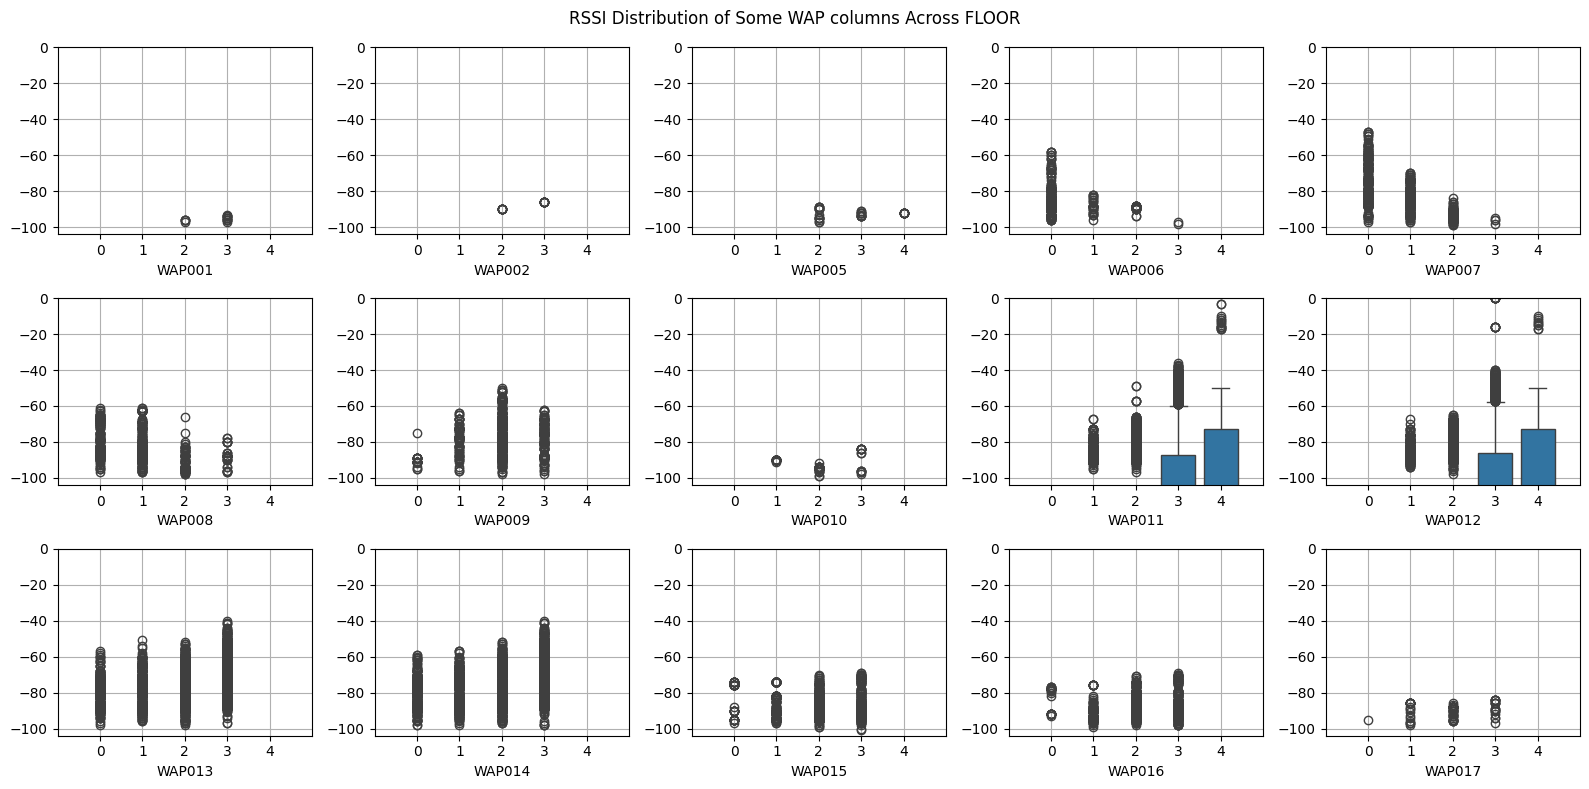

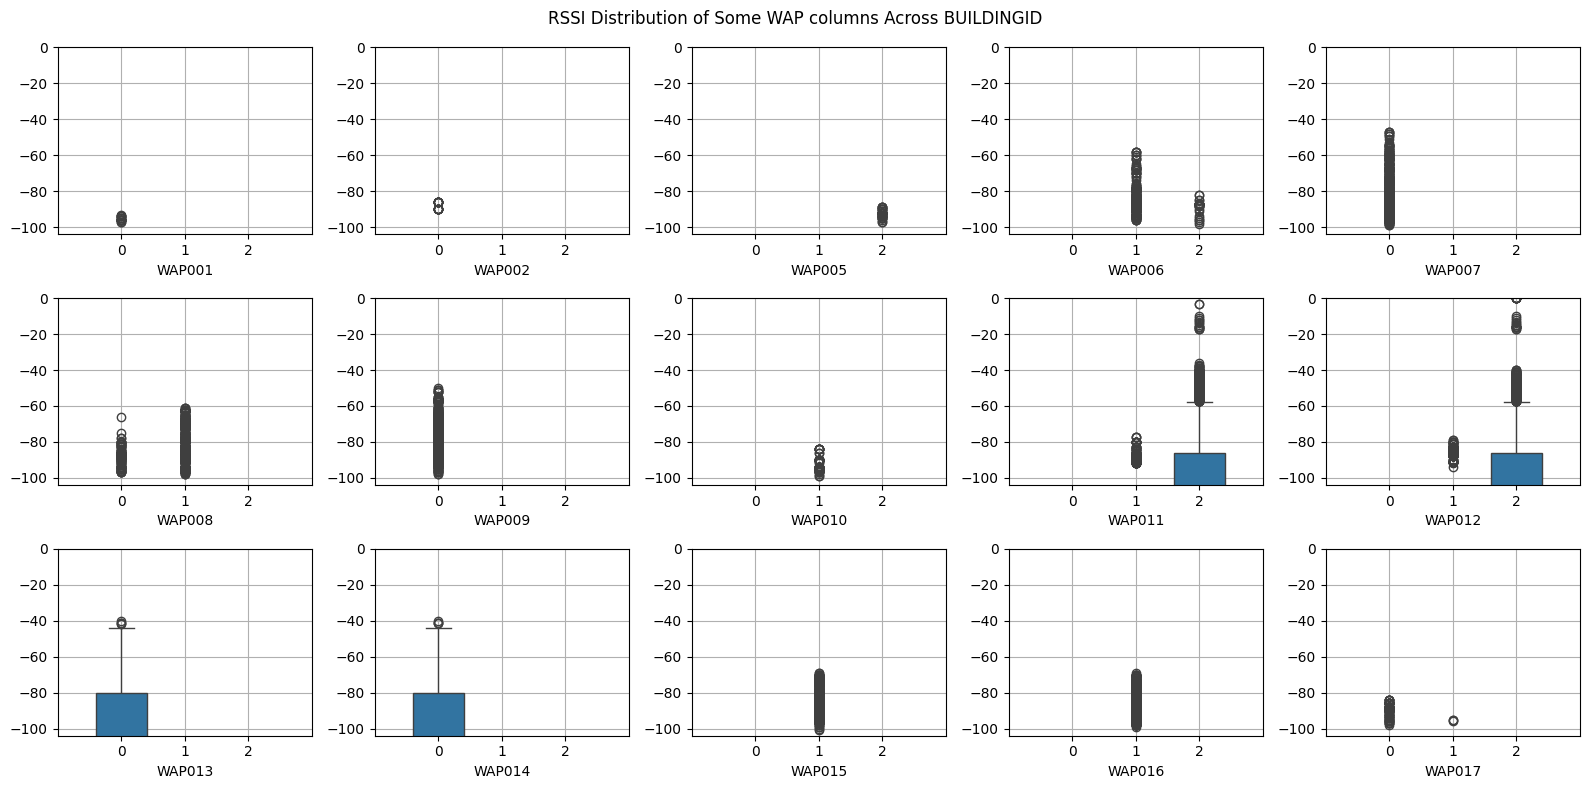

In [59]:
columns = 5
rows = 3

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(WAP_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["FLOOR"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 5)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across FLOOR")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(WAP_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["BUILDINGID"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 3)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across BUILDINGID")
plt.tight_layout()
plt.show()


In [60]:
WAP_multifloor = [] 
for WAP in WAP_columns:
    max_value = df[WAP].max() 
    max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

    # If the WAP originally had high signals on multiple floors, add to list
    if len(max_floors) > 1: WAP_multifloor.append(WAP)
        
    # If there are more than 1 floor for a max_value then check the next highest
    while len(max_floors) > 1:
        max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
        max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

    print(f"{WAP} has max RSSI {max_value:>3} detected on floors: {max_floors}")
print("WAP_multifloor (WAPs that have high signals on multiple floors):", WAP_multifloor)

WAP_multibuilding = [] 
for WAP in WAP_columns:
    max_value = df[WAP].max() 
    max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

    # If the WAP originally had high signals on multiple buildings, add to list
    if len(max_buildings) > 1: WAP_multibuilding.append(WAP)
        
    # If there are more than 1 building for a max_value then check the next highest
    while len(max_buildings) > 1:
        max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
        max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

    print(f"{WAP} has max RSSI {max_value:>3} detected on buildings: {max_buildings}")
print("WAP_multibuilding (WAPs that have high signals on multiple buildings):", WAP_multifloor)



WAP001 has max RSSI -93 detected on floors: [3]
WAP002 has max RSSI -86 detected on floors: [3]
WAP005 has max RSSI -89 detected on floors: [2]
WAP006 has max RSSI -58 detected on floors: [0]
WAP007 has max RSSI -47 detected on floors: [0]
WAP008 has max RSSI -64 detected on floors: [0]
WAP009 has max RSSI -50 detected on floors: [2]
WAP010 has max RSSI -84 detected on floors: [3]
WAP011 has max RSSI  -3 detected on floors: [4]
WAP012 has max RSSI   0 detected on floors: [3]
WAP013 has max RSSI -40 detected on floors: [3]
WAP014 has max RSSI -40 detected on floors: [3]
WAP015 has max RSSI -69 detected on floors: [3]
WAP016 has max RSSI -69 detected on floors: [3]
WAP017 has max RSSI -84 detected on floors: [3]
WAP018 has max RSSI -76 detected on floors: [3]
WAP019 has max RSSI -51 detected on floors: [2]
WAP020 has max RSSI -50 detected on floors: [2]
WAP021 has max RSSI -90 detected on floors: [3]
WAP022 has max RSSI -90 detected on floors: [3]
WAP023 has max RSSI -40 detected on floo

# GPT PREDICTION

In [74]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("./UJIndoorLoc/trainingData.csv")

# List all Wi-Fi fingerprint columns (WAPs)
wap_columns = [col for col in df.columns if col.startswith("WAP")]

# Replace "100" (no signal) with -105 (weaker than the weakest signal)
df[wap_columns] = df[wap_columns].replace(100, -105)

# Normalize WAP values (optional, scaling RSSI values between 0 and 1)
df[wap_columns] = (df[wap_columns] + 105) / 105

# Define features (Wi-Fi RSSI) and targets (Building ID & Floor)
X = df[wap_columns]  # Features: WAP signals
y_building = df["BUILDINGID"]  # Target 1: Building ID
y_floor = df["FLOOR"]  # Target 2: Floor

from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_building_train, y_building_test = train_test_split(X, y_building, test_size=0.2, random_state=42)
X_train, X_test, y_floor_train, y_floor_test = train_test_split(X, y_floor, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model for Building ID
building_model = RandomForestClassifier(n_estimators=100, random_state=42)
building_model.fit(X_train, y_building_train)

# Predict on test set
y_building_pred = building_model.predict(X_test)

# Evaluate accuracy
building_accuracy = accuracy_score(y_building_test, y_building_pred)
print(f"Building ID Prediction Accuracy: {building_accuracy:.4f}")

# Train a Random Forest model for Floor
floor_model = RandomForestClassifier(n_estimators=100, random_state=42)
floor_model.fit(X_train, y_floor_train)

# Predict on test set
y_floor_pred = floor_model.predict(X_test)

# Evaluate accuracy
floor_accuracy = accuracy_score(y_floor_test, y_floor_pred)
print(f"Floor Prediction Accuracy: {floor_accuracy:.4f}")



Building ID Prediction Accuracy: 0.9980
Floor Prediction Accuracy: 0.9962


Decision Tree Accuracy for Building ID: 0.8736


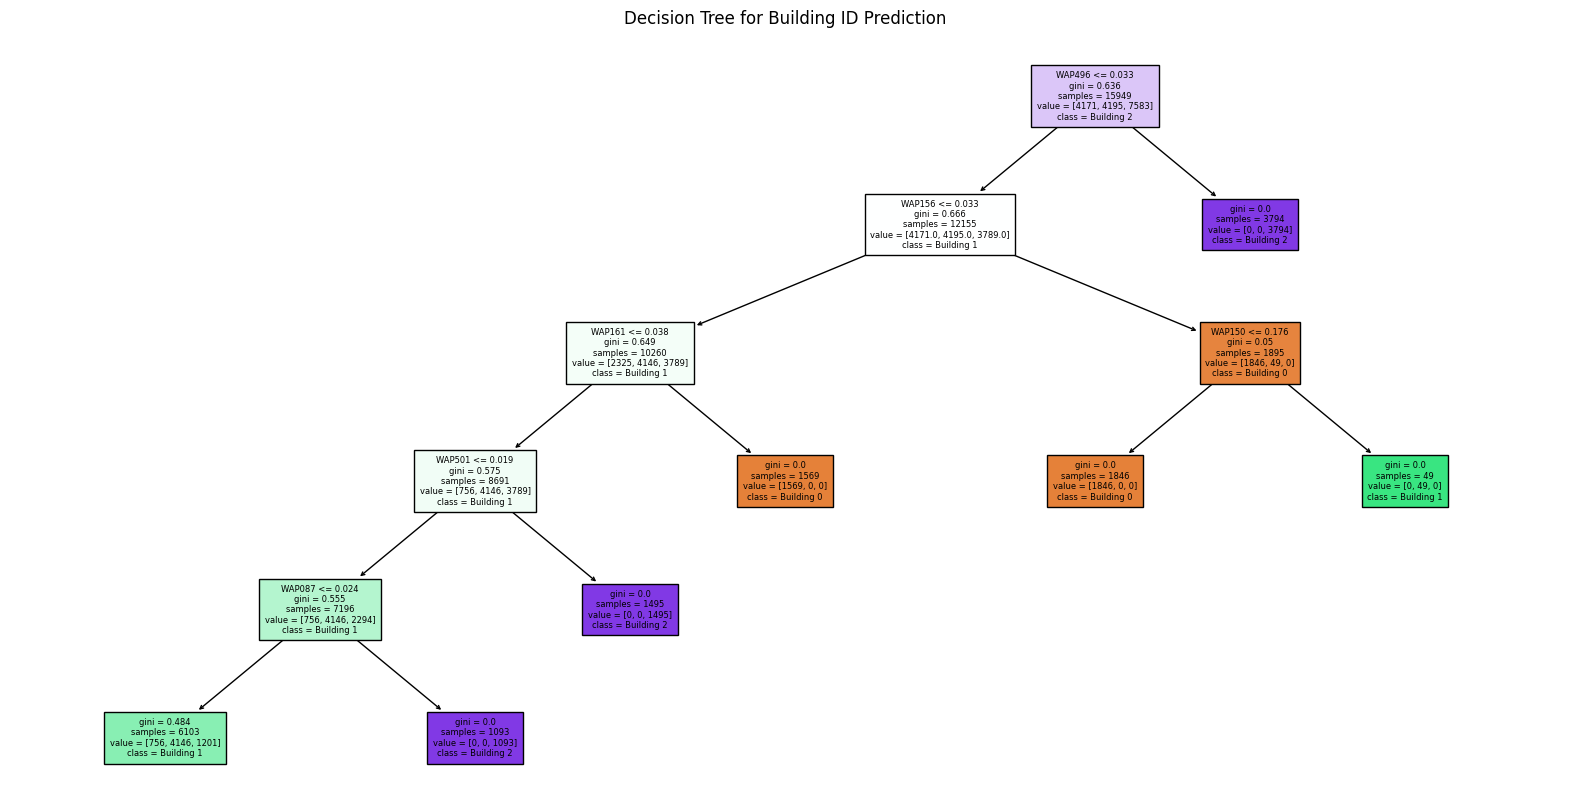

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("./UJIndoorLoc/trainingData.csv")

# List all Wi-Fi fingerprint columns (WAPs)
wap_columns = [col for col in df.columns if col.startswith("WAP")]

# Replace "100" (no signal) with -105 (weaker than the weakest signal)
df[wap_columns] = df[wap_columns].replace(100, -105)

# Normalize WAP values (optional, scaling RSSI between 0 and 1)
df[wap_columns] = (df[wap_columns] + 105) / 105

# Define features (Wi-Fi RSSI) and target (Building ID)
X = df[wap_columns]  # Features: WAP signals
y_building = df["BUILDINGID"]  # Target: Building ID

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_building, test_size=0.2, random_state=42)

# Train a Decision Tree model for Building ID
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred = tree_model.predict(X_test)

# Evaluate accuracy
tree_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy for Building ID: {tree_accuracy:.4f}")

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=wap_columns, class_names=["Building 0", "Building 1", "Building 2"], filled=True, fontsize=6)
plt.title("Decision Tree for Building ID Prediction")
plt.show()


# Code not used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (ensure correct path)
df = pd.read_csv("./UJIndoorLoc/trainingData.csv")

# Sort floors in ascending order
unique_floors = sorted(df['FLOOR'].unique())

# Create a figure with a 2-row, 3-column layout
fig = plt.figure(figsize=(16,8))

# Plot scatter plots for each floor in the grid
for idx, floor in enumerate(unique_floors, start=1):
    plt.subplot(2, 3, idx)  # 2 rows, 3 columns, current plot index
    floor_data = df[df['FLOOR'] == floor]
    
    # Scatter plot with SPACEID as color
    scatter = plt.scatter(
        floor_data['LONGITUDE'], floor_data['LATITUDE'],  plot with BUILDINGID as color
        c=floor_data['SPACEID'], alpha=0.1
    )
    
    plt.title(f'Floor {floor}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

# Adjust layout for better visualization
plt.suptitle('Wi-Fi Fingerprinting Data - Floors Overview (Colored by SPACEID)', fontsize=16)
plt.tight_layout()
plt.show()
